In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

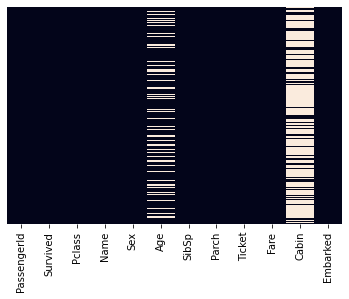

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [11]:
train.isnull().sum()/train.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

## Exploratory data analysis

In [12]:
train.shape

(891, 12)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Survived', ylabel='count'>

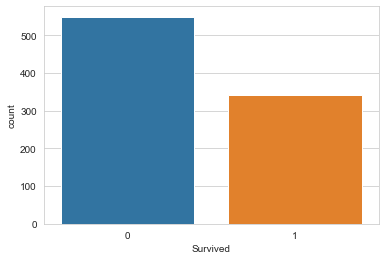

In [17]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

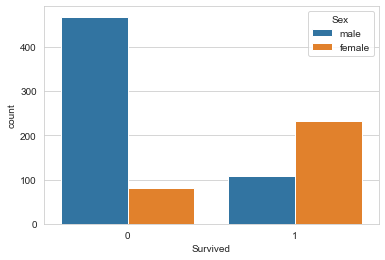

In [20]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Survived', hue='Sex')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

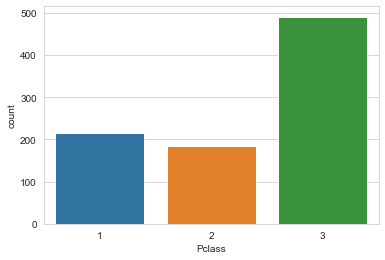

In [19]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Pclass')

<AxesSubplot:xlabel='Survived', ylabel='count'>

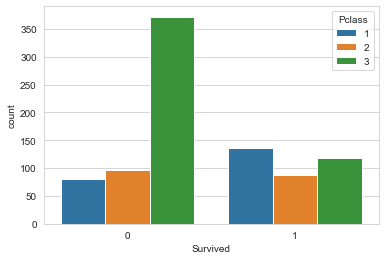

In [24]:
sns.set_style('whitegrid')
sns.countplot(data=train, hue='Pclass', x='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

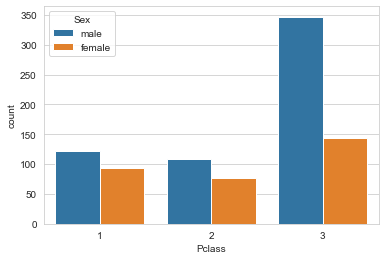

In [23]:
sns.set_style('whitegrid')
sns.countplot(data=train, x='Pclass', hue='Sex')

<AxesSubplot:xlabel='Age', ylabel='Count'>

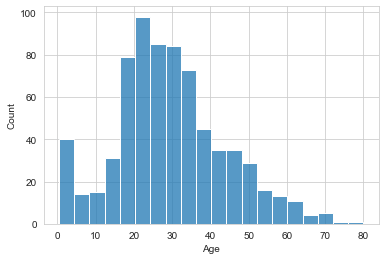

In [25]:
sns.histplot(data=train, x='Age')

<AxesSubplot:xlabel='Age', ylabel='Count'>

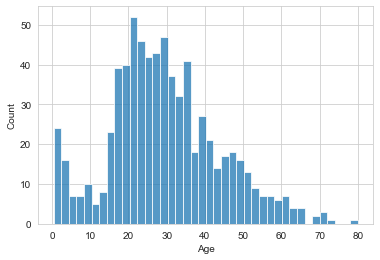

In [26]:
sns.histplot(train['Age'].dropna(), bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

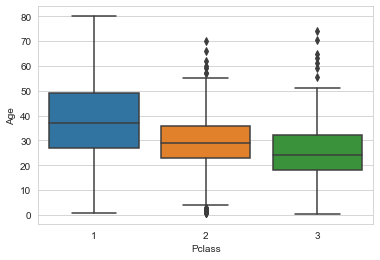

In [33]:
sns.boxplot(data=train, x='Pclass', y='Age')

In [124]:
median_ages_dict = train.groupby('Pclass')[['Age']].median().to_dict()
median_ages = median_ages_dict['Age']

In [125]:
median_ages

{1: 37.0, 2: 29.0, 3: 24.0}

In [126]:
def impute_age(cols):
    pclass = cols[0]
    age = cols[1]
    if pd.isnull(age):
        if pclass==1:
            return median_ages[1]
        elif pclass==2:
            return median_ages[2]
        else:
            return median_ages[3]
    else:
        return age

In [127]:
train['Age'] = train[['Pclass', 'Age']].apply(impute_age, axis=1)

<AxesSubplot:>

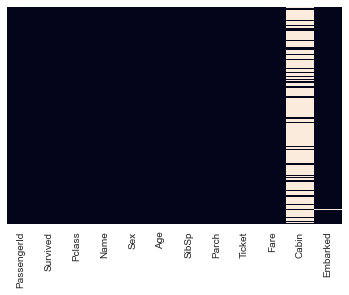

In [88]:
sns.heatmap(train.isnull(), yticklabels=False ,cbar=False)

In [93]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [129]:
train.drop(['Name','Ticket', 'PassengerId'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [130]:
train.drop('Cabin', axis=1, inplace=True)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [97]:
train.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

In [99]:
train.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

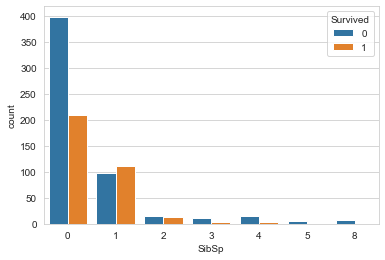

In [102]:
sns.countplot(data=train, x='SibSp', hue='Survived')

<AxesSubplot:xlabel='Parch', ylabel='count'>

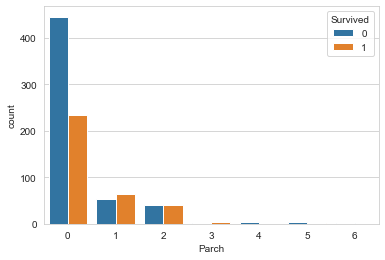

In [103]:
sns.countplot(data=train, x='Parch', hue='Survived')

<AxesSubplot:>

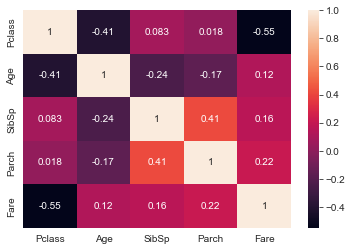

In [133]:
sns.heatmap(train.drop(['Sex','Survived','Embarked'], axis=1).corr(), annot=True)

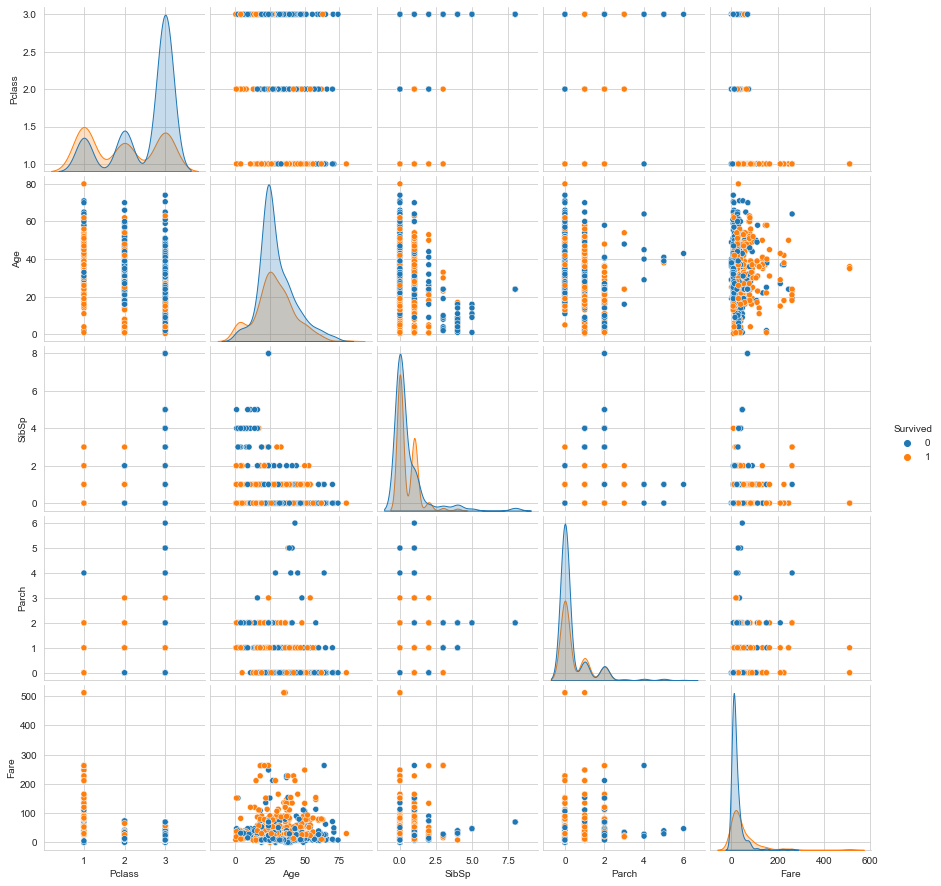

In [115]:
numeric_cols = ['Pclass','Age','SibSp','Parch','Fare']

sns.pairplot(train, hue='Survived')

In [134]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [141]:
Sex = pd.get_dummies(train['Sex'], dtype=float, drop_first=True)
Embarked = pd.get_dummies(train['Embarked'], dtype=float)

In [142]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [143]:
train.drop(['Sex','Embarked'], axis=1, inplace=True)

In [144]:
train = pd.concat([train, Sex, Embarked], axis=1)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,C,Q,S
0,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0


In [145]:
train.shape

(891, 10)

In [150]:
# splitting into train_test data

from sklearn.model_selection import train_test_split as tts
y = train['Survived']
X = train.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42

(623, 9)

In [152]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [153]:
predictions = lr_model.predict(X_train)

In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(predictions, y_train)

0.8041733547351525

In [158]:
conf_mat = confusion_matrix(y_train, predictions)
conf_mat

array([[343,  49],
       [ 73, 158]], dtype=int64)

In [159]:
test_preds = lr_model.predict(X_test)
print(accuracy_score(predictions, y_train))
confusion_matrix(y_test, test_preds)

0.8041733547351525


array([[137,  20],
       [ 30,  81]], dtype=int64)